In [1]:
import numpy as np
import pandas as pd 

data = pd.read_csv("Coffe_sales.csv")

df = pd.DataFrame(data)


In [2]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [3]:
print(df.head(10))

   hour_of_day cash_type  money          coffee_name Time_of_Day Weekday  \
0           10      card   38.7                Latte     Morning     Fri   
1           12      card   38.7        Hot Chocolate   Afternoon     Fri   
2           12      card   38.7        Hot Chocolate   Afternoon     Fri   
3           13      card   28.9            Americano   Afternoon     Fri   
4           13      card   38.7                Latte   Afternoon     Fri   
5           15      card   33.8  Americano with Milk   Afternoon     Fri   
6           16      card   38.7        Hot Chocolate   Afternoon     Fri   
7           18      card   33.8  Americano with Milk       Night     Fri   
8           19      card   38.7                Cocoa       Night     Fri   
9           19      card   33.8  Americano with Milk       Night     Fri   

  Month_name  Weekdaysort  Monthsort        Date             Time  
0        Mar            5          3  2024-03-01  10:15:50.520000  
1        Mar            5  

In [4]:
print(df.tail(10))

      hour_of_day cash_type  money          coffee_name Time_of_Day Weekday  \
3537           15      card  21.06             Espresso   Afternoon     Sat   
3538           16      card  35.76                Latte   Afternoon     Sat   
3539           17      card  30.86  Americano with Milk       Night     Sat   
3540           19      card  30.86  Americano with Milk       Night     Sat   
3541           10      card  35.76                Latte     Morning     Sun   
3542           10      card  35.76           Cappuccino     Morning     Sun   
3543           14      card  35.76                Cocoa   Afternoon     Sun   
3544           14      card  35.76                Cocoa   Afternoon     Sun   
3545           15      card  25.96            Americano   Afternoon     Sun   
3546           18      card  35.76                Latte       Night     Sun   

     Month_name  Weekdaysort  Monthsort        Date             Time  
3537        Mar            6          3  2025-03-22  15:57:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


🧩 1. Understand Coffee Shop Performance

Find when, what, and how people buy coffee.

* Identify the most profitable time of day (Morning, Afternoon, or Evening).

* Discover which coffee types make the most money.

* Analyze peak hours and busiest weekdays.


In [6]:
grouped=  df.groupby("Time_of_Day")["money"].sum().reset_index()
max_row = grouped.loc[[grouped["money"].idxmax()]]
print(max_row)

  Time_of_Day     money
2       Night  38186.34


In [7]:
coffee_money =  df.groupby("coffee_name")["money"].sum().reset_index()
max_coffee_money = coffee_money.loc[[coffee_money["money"].idxmax()]]
print(max_coffee_money)

  coffee_name    money
7       Latte  26875.3


In [8]:
busy_day =  df.groupby("Weekday")["hour_of_day"].sum().reset_index()
max_busy_day = busy_day.loc[[busy_day["hour_of_day"].idxmax()]]
print(max_busy_day)

  Weekday  hour_of_day
5     Tue         8160


💰 2. Analyze Sales Trends

Use your Date, Weekday, Month_name, and hour_of_day columns to:

* Find weekly and monthly trends in sales.

* See if weekends have higher sales than weekdays.

* Observe seasonal patterns (like higher sales in winter months).

In [9]:
weekly_sale = df.groupby(["Weekday","Weekdaysort"])["money"].sum().reset_index()
sort_weekday = weekly_sale.sort_values("Weekdaysort")
print(sort_weekday)

  Weekday  Weekdaysort     money
1     Mon            1  17363.10
5     Tue            2  18168.38
6     Wed            3  15750.46
4     Thu            4  16091.40
0     Fri            5  16802.66
2     Sat            6  14733.52
3     Sun            7  13336.06


In [10]:
weekly_sale["Weekendsa_Weekdays"] = weekly_sale["Weekday"].apply(
    lambda x : "Weekend" if x in ["Sat","Sun"] else "Weekday"
)
print(weekly_sale)

  Weekday  Weekdaysort     money Weekendsa_Weekdays
0     Fri            5  16802.66            Weekday
1     Mon            1  17363.10            Weekday
2     Sat            6  14733.52            Weekend
3     Sun            7  13336.06            Weekend
4     Thu            4  16091.40            Weekday
5     Tue            2  18168.38            Weekday
6     Wed            3  15750.46            Weekday


In [11]:



total_days_sell = weekly_sale.groupby("Weekendsa_Weekdays")["money"].sum().reset_index()

print(total_days_sell)




  Weekendsa_Weekdays     money
0            Weekday  84176.00
1            Weekend  28069.58


In [12]:
best_days = weekly_sale.groupby("Weekendsa_Weekdays")["money"].mean().reset_index()

print(best_days)

  Weekendsa_Weekdays     money
0            Weekday  16835.20
1            Weekend  14034.79


In [13]:
df["Weekendsa_Weekdays"] = df["Weekday"].apply(lambda x: "Weekend" if x in ["Sat","Sun"] else "Weekday")

best_days = df.groupby("Weekendsa_Weekdays")["money"].mean().reset_index()

print(best_days)




  Weekendsa_Weekdays      money
0            Weekday  31.668924
1            Weekend  31.574331


C:\Users\sukhi\AppData\Local\Temp\ipykernel_14228\2925367451.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_of_day"] = pd.to_datetime(df["Time"]).dt.hour


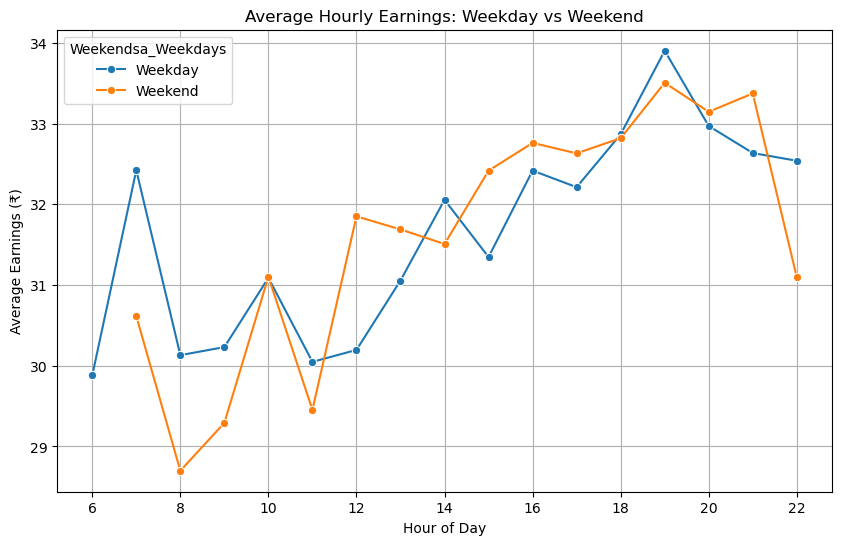

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


df["hour_of_day"] = pd.to_datetime(df["Time"]).dt.hour


hourly_sell = df.groupby(["Weekendsa_Weekdays","hour_of_day"])["money"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_sell, x="hour_of_day", y="money", hue="Weekendsa_Weekdays", marker="o")
plt.title("Average Hourly Earnings: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Average Earnings (₹)")
plt.grid(True)
plt.show()


In [15]:
month_sale = df.groupby(["Month_name","Monthsort"])["money"].sum().reset_index()
sort_month = month_sale.sort_values("Monthsort")
print(sort_month)

   Month_name  Monthsort     money
4         Jan          1   6398.86
3         Feb          2  13215.48
7         Mar          3  15891.64
0         Apr          4   5719.56
8         May          5   8164.42
6         Jun          6   7617.76
5         Jul          7   6915.94
1         Aug          8   7613.84
11        Sep          9   9988.64
10        Oct         10  13891.16
9         Nov         11   8590.54
2         Dec         12   8237.74


In [16]:
def get_season(month_name):
    if month_name in [12,1,2]:
        return "Winter"
    elif month_name in [3,4,5,6]:
        return "Summer"
    elif month_name  in [7,8,9]:
        return 'Monsoon'
    else:
        return "Autumn"
    
df["Season"] = df["Monthsort"].apply(get_season)

print(df["Season"].value_counts())

Season
Summer     1126
Winter      883
Monsoon     853
Autumn      685
Name: count, dtype: int64


In [17]:
average_trac_monthly =df.groupby("Season")["money"].mean().reset_index()
print(average_trac_monthly.round(2))


    Season  money
0   Autumn  32.82
1  Monsoon  28.74
2   Summer  33.21
3   Winter  31.54


In [18]:
most_sold_seasonly = df.groupby("Season")["coffee_name"].agg(lambda x: x.mode()[0]).reset_index()
print(most_sold_seasonly)

    Season          coffee_name
0   Autumn                Latte
1  Monsoon  Americano with Milk
2   Summer  Americano with Milk
3   Winter  Americano with Milk


In [19]:
coffee_count = df.groupby(["Season","coffee_name"]).size().reset_index(name="count")

coffee_counts = coffee_count.sort_values(by=["Season", "count"], ascending=[True, False])


most_sold = coffee_counts.groupby("Season").first().reset_index()


least_sold = coffee_counts.groupby("Season").last().reset_index()

print("☕ Most Sold Coffee per Season:")
print(most_sold)

print("\n🥶 Least Sold Coffee per Season:")
print(least_sold)

☕ Most Sold Coffee per Season:
    Season          coffee_name  count
0   Autumn                Latte    188
1  Monsoon  Americano with Milk    241
2   Summer  Americano with Milk    240
3   Winter  Americano with Milk    194

🥶 Least Sold Coffee per Season:
    Season    coffee_name  count
0   Autumn       Espresso     15
1  Monsoon  Hot Chocolate     28
2   Summer       Espresso     40
3   Winter       Espresso     34


In [20]:
most_sold["Type"] = "Most Sold"
least_sold["Type"] = "Least Sold"


combined_sales = pd.concat([most_sold, least_sold])

print(combined_sales)

    Season          coffee_name  count        Type
0   Autumn                Latte    188   Most Sold
1  Monsoon  Americano with Milk    241   Most Sold
2   Summer  Americano with Milk    240   Most Sold
3   Winter  Americano with Milk    194   Most Sold
0   Autumn             Espresso     15  Least Sold
1  Monsoon        Hot Chocolate     28  Least Sold
2   Summer             Espresso     40  Least Sold
3   Winter             Espresso     34  Least Sold


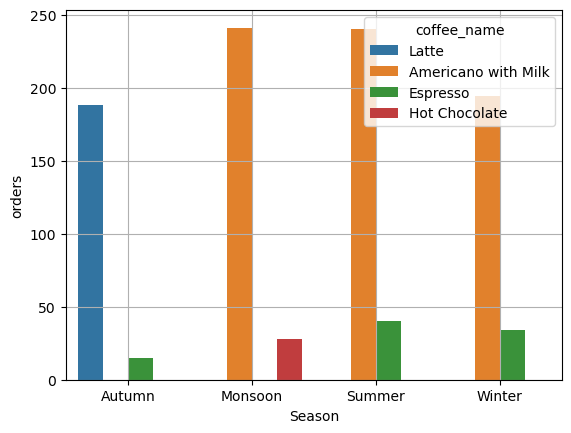

In [21]:
sns.barplot(data=combined_sales , x= "Season",y = "count", hue="coffee_name")
plt.ylabel("orders")
plt.grid()
plt.show()

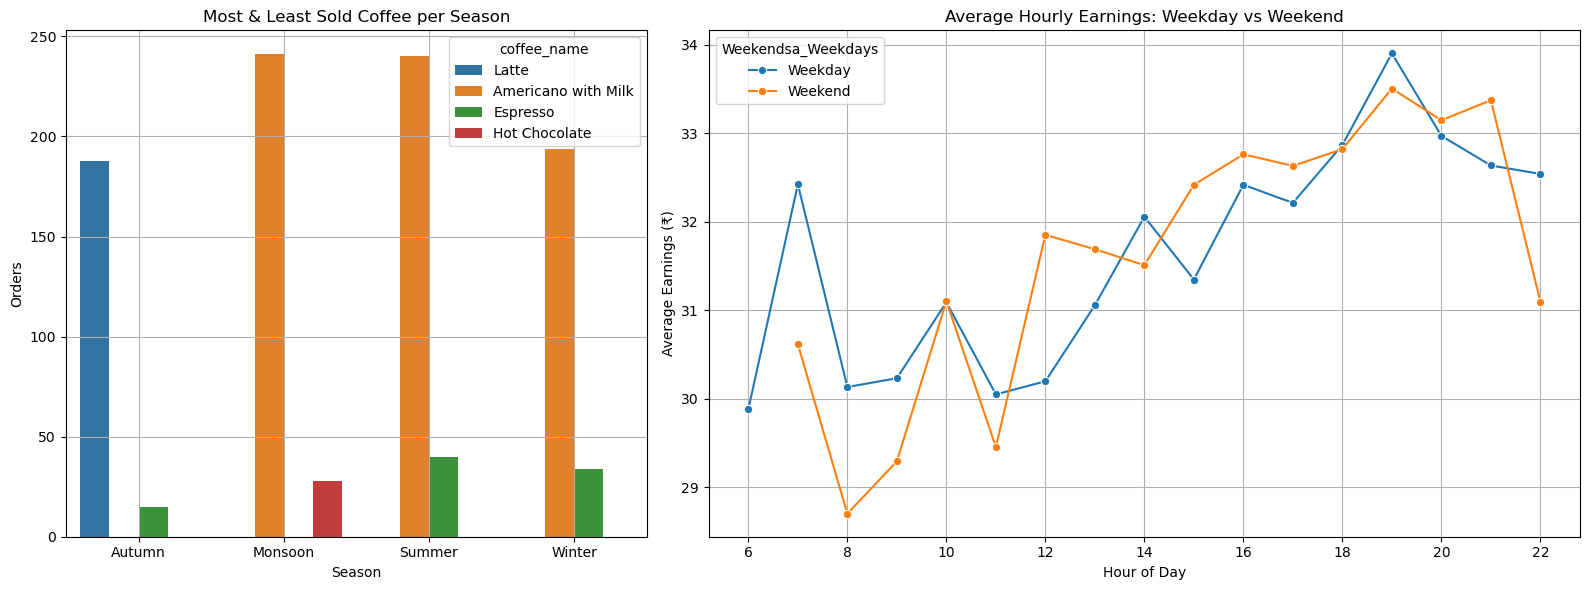

In [22]:


fig, axes = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios':[1,1.5]})


sns.barplot(data=combined_sales, x="Season", y="count", hue="coffee_name", ax=axes[0])
axes[0].set_ylabel("Orders")
axes[0].grid(True)
axes[0].set_title("Most & Least Sold Coffee per Season")


sns.lineplot(data=hourly_sell, x="hour_of_day", y="money", hue="Weekendsa_Weekdays", marker="o", ax=axes[1])
axes[1].set_title("Average Hourly Earnings: Weekday vs Weekend")
axes[1].set_xlabel("Hour of Day")
axes[1].set_ylabel("Average Earnings (₹)")
axes[1].grid(True)

plt.tight_layout()
plt.show()
